In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
loc = "Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"

In [2]:
data = pd.read_csv(loc)
ArrestLocDiv_list = data.ArrestLocDiv.unique()
data_column = data.columns
data_column

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [3]:
data_RQ1 = data[['Perceived_Race','ArrestLocDiv','StripSearch']]
data_RQ1 = data_RQ1.groupby(['Perceived_Race','ArrestLocDiv']).mean()
data_RQ1.head(30)

StripSearch
Perceived_Race       ArrestLocDiv             
Black                11               0.139651
                     12               0.162935
                     13               0.149758
                     14               0.251389
                     22               0.118304
                     23               0.098361
                     31               0.156313
                     32               0.116711
                     33               0.145299
                     41               0.155150
                     42               0.178030
                     43               0.250585
                     51               0.308550
                     52               0.230769
                     53               0.244681
                     54               0.190476
                     55               0.199336
                     XX               0.060513
East/Southeast Asian 11               0.147059
                     12               0.074627
                     13               0.105263
                     14               0.192000
                     22               0.031250
                     23               0.125000
                     31               0.121019
                     32               0.111111
                     33               0.025641
                     41               0.118280
                     42               0.097315
                     43               0.195238

In [4]:
data_RQ4 = data.copy() 
data_RQ4 = data_RQ4[["Arrest_Year","Arrest_Month",'ArrestLocDiv']]
data_RQ4 = data_RQ4.groupby(["Arrest_Year", "Arrest_Month", "ArrestLocDiv"]).size().reset_index(name='number_of_arrest')
data_RQ4.head(50)

,Arrest_Year,Arrest_Month,ArrestLocDiv,number_of_arrest
0,2020,Apr-June,11,176
1,2020,Apr-June,12,175
2,2020,Apr-June,13,98
3,2020,Apr-June,14,364
4,2020,Apr-June,22,223
5,2020,Apr-June,23,168
6,2020,Apr-June,31,229
7,2020,Apr-June,32,227
8,2020,Apr-June,33,101
9,2020,Apr-June,41,285


In [5]:
# Q1 RACE & LOCATION ---- STRIPSEARCHES

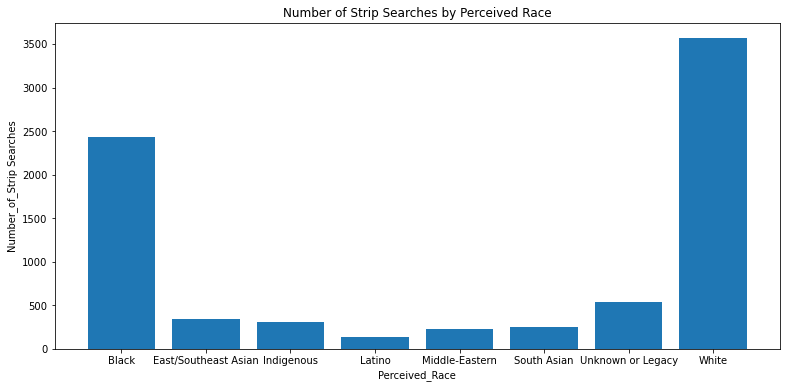

In [6]:
# create a subset of the data that only includes records where a strip search was conducted
strip_searches = data[data['StripSearch'] == 1]

# group the data by race and count the number of records in each group
strip_searches_by_race = strip_searches.groupby('Perceived_Race')['StripSearch'].count().reset_index()

# create a bigger plot
fig, ax = plt.subplots(figsize=(13, 6))

# create a bar chart of the data
ax.bar(strip_searches_by_race['Perceived_Race'], strip_searches_by_race['StripSearch'])
ax.set_xlabel('Perceived_Race')
ax.set_ylabel('Number_of_Strip Searches')
ax.set_title('Number of Strip Searches by Perceived Race')
plt.show()

/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/2459380031.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strip_searches_by_location['ArrestLocDiv'], rotation=90)


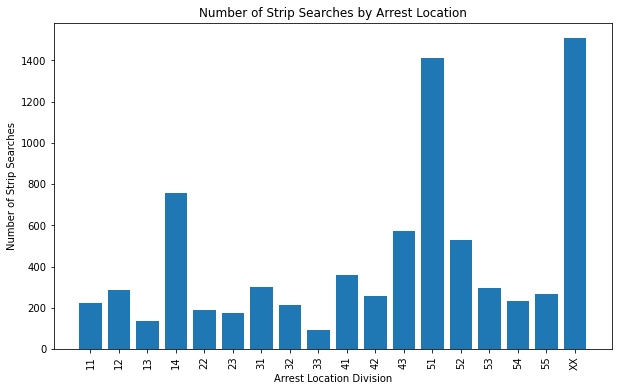

In [7]:
# group the data by ArrestLocDiv and count the number of records in each group
strip_searches_by_location = strip_searches.groupby('ArrestLocDiv')['StripSearch'].count().reset_index()

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(strip_searches_by_location['ArrestLocDiv'], strip_searches_by_location['StripSearch'])
ax.set_xticklabels(strip_searches_by_location['ArrestLocDiv'], rotation=90)
ax.set_xlabel('Arrest Location Division')
ax.set_ylabel('Number of Strip Searches')
ax.set_title('Number of Strip Searches by Arrest Location')
plt.show()

/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/2089773705.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strip_searches_by_location_1['ArrestLocDiv'], rotation=90)


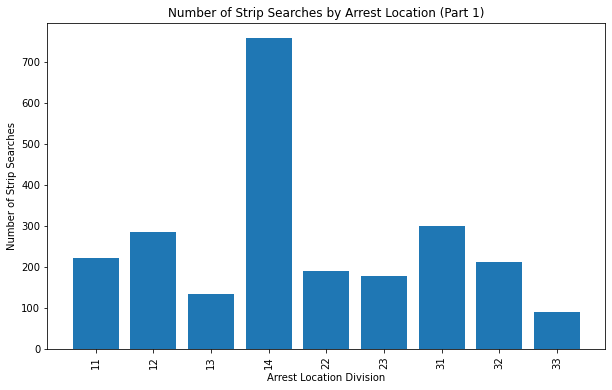

/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/2089773705.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strip_searches_by_location_2['ArrestLocDiv'], rotation=90)


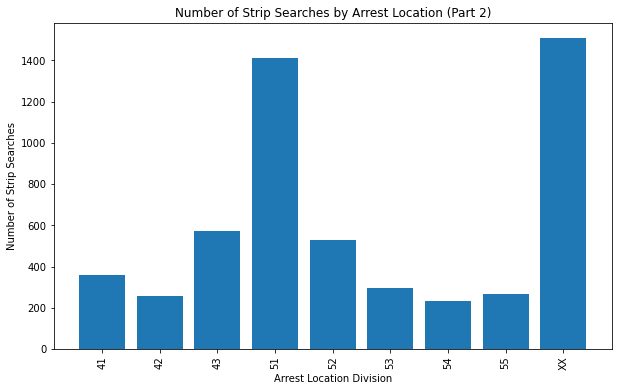

In [8]:
# group the data by ArrestLocDiv and count the number of records in each group
strip_searches_by_location = strip_searches.groupby('ArrestLocDiv')['StripSearch'].count().reset_index()

# split the data into two groups to create two separate plots
num_groups = len(strip_searches_by_location)
midpoint = num_groups // 2
strip_searches_by_location_1 = strip_searches_by_location.iloc[:midpoint, :]
strip_searches_by_location_2 = strip_searches_by_location.iloc[midpoint:, :]

# create the first plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(strip_searches_by_location_1['ArrestLocDiv'], strip_searches_by_location_1['StripSearch'])
ax.set_xticklabels(strip_searches_by_location_1['ArrestLocDiv'], rotation=90)
ax.set_xlabel('Arrest Location Division')
ax.set_ylabel('Number of Strip Searches')
ax.set_title('Number of Strip Searches by Arrest Location (Part 1)')
plt.show()

# create the second plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(strip_searches_by_location_2['ArrestLocDiv'], strip_searches_by_location_2['StripSearch'])
ax.set_xticklabels(strip_searches_by_location_2['ArrestLocDiv'], rotation=90)
ax.set_xlabel('Arrest Location Division')
ax.set_ylabel('Number of Strip Searches')
ax.set_title('Number of Strip Searches by Arrest Location (Part 2)')
plt.show()

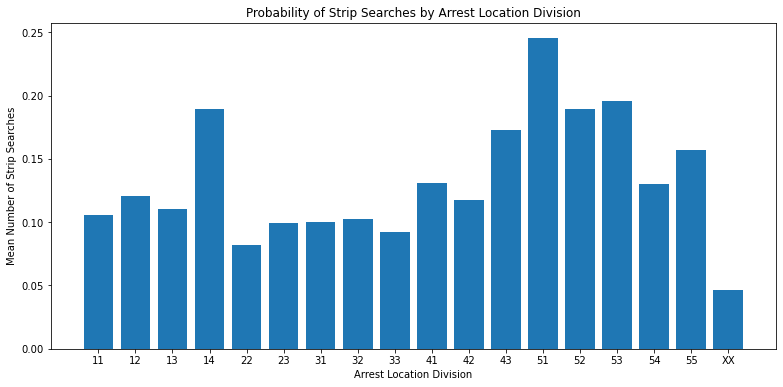

In [9]:
# compute the mean number of strip searches for each location
mean_strip_searches_1 = data_RQ1.groupby('ArrestLocDiv')['StripSearch'].mean()

# create a bar chart of the data
fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(mean_strip_searches_1.index, mean_strip_searches_1.values)
ax.set_xlabel('Arrest Location Division')
ax.set_ylabel('Mean Number of Strip Searches')
ax.set_title('Probability of Strip Searches by Arrest Location Division')
plt.show()

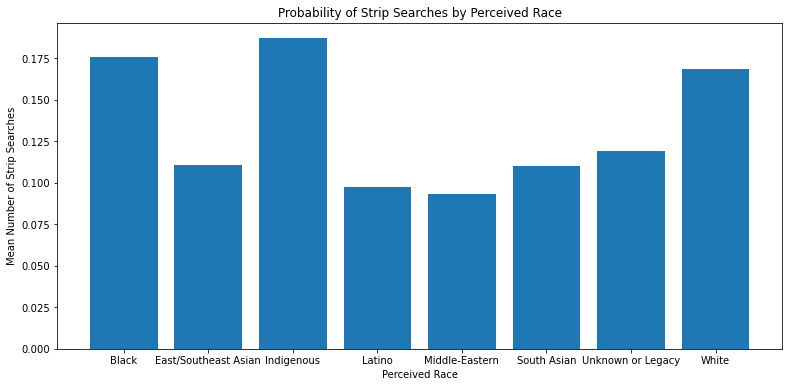

In [10]:
# compute the mean number of strip searches for each location
mean_strip_searches_2 = data_RQ1.groupby('Perceived_Race')['StripSearch'].mean()

# create a bar chart of the data
fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(mean_strip_searches_2.index, mean_strip_searches_2.values)
ax.set_xlabel('Perceived Race')
ax.set_ylabel('Mean Number of Strip Searches')
ax.set_title('Probability of Strip Searches by Perceived Race')
plt.show()

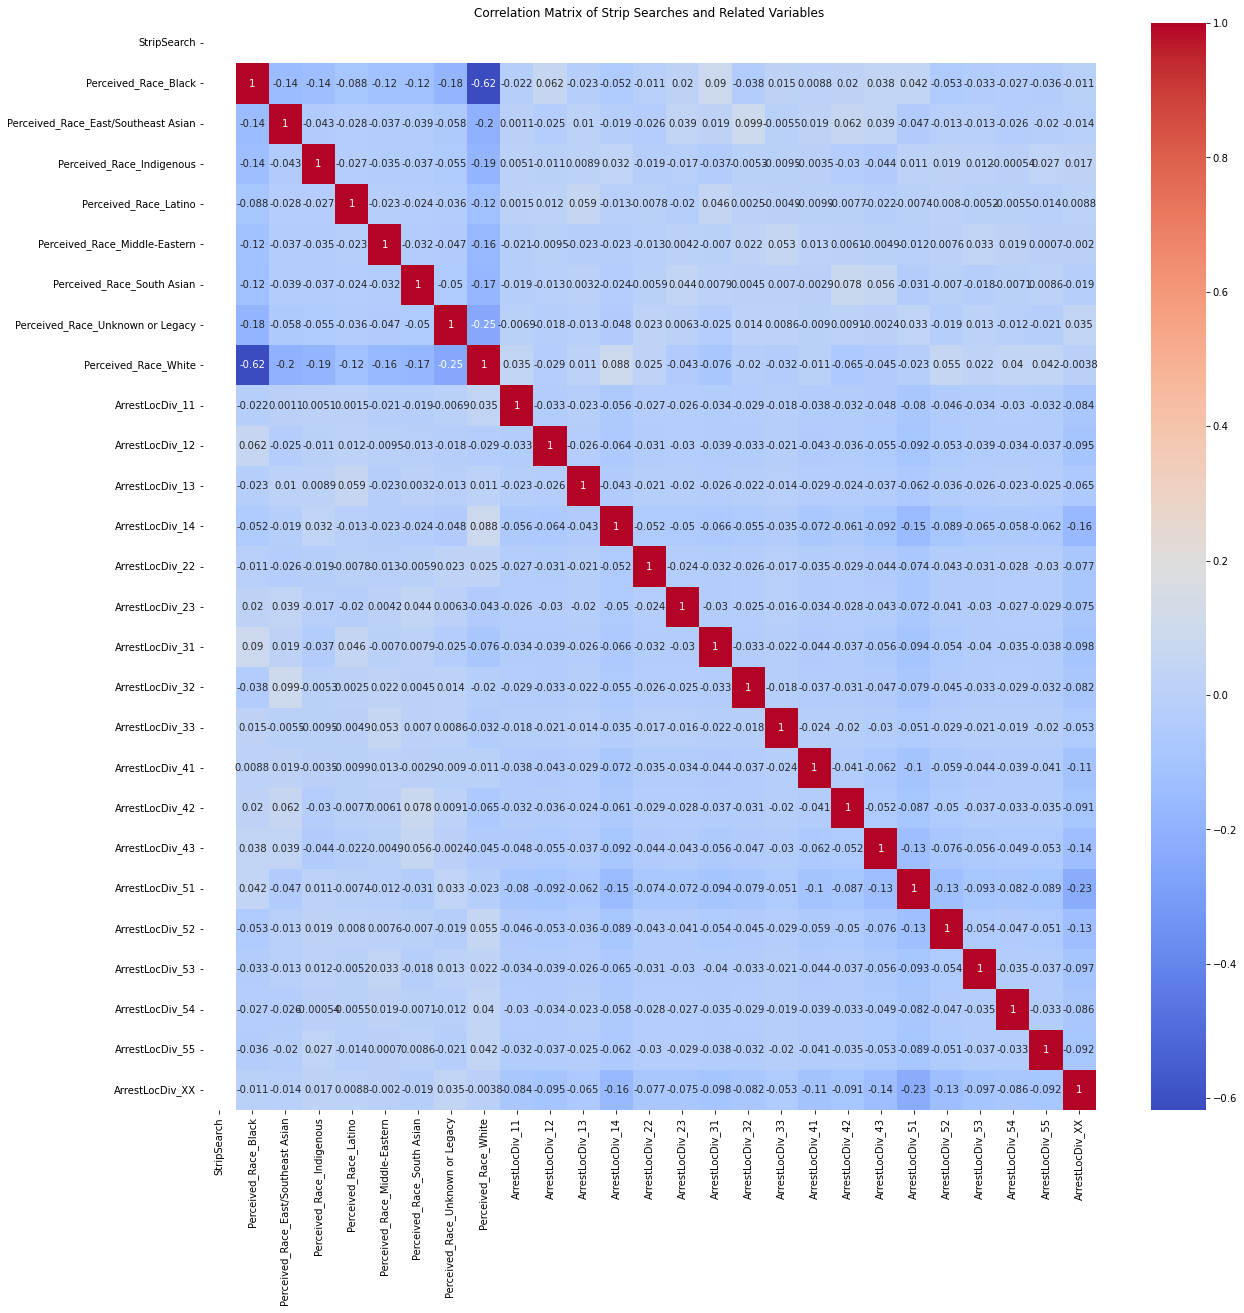

In [11]:
# select the columns of interest
cols_of_interest = ['StripSearch', 'Perceived_Race', 'ArrestLocDiv']
strip_searches_subset = strip_searches[cols_of_interest]

# convert categorical variables to dummy variables
strip_searches_dummies = pd.get_dummies(strip_searches_subset)

# compute the correlation matrix of the data
corr_matrix = strip_searches_dummies.corr()

# create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Correlation Matrix of Strip Searches and Related Variables')
plt.show()

In [12]:
# Q2 QUARTER & LOCATION ------ ARRESTS

In [13]:
data.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [14]:
# Create a dictionary to map Arrest_Month to quarters
quarter_dict = {'Jan-Mar': 'Q1', 'Apr-June': 'Q2', 'July-Sept': 'Q3', 'Oct-Dec': 'Q4'}

# Convert Arrest_Month to quarters
data['Quarter'] = data['Arrest_Year'].astype(str) + data['Arrest_Month'].map(quarter_dict)

# Group by Quarter and ArrestLocDiv, and count the number of rows
arrest_counts = data.groupby(['Quarter', 'ArrestLocDiv']).size().reset_index(name='the number of arrest')

# Print the first few rows of the resulting DataFrame
arrest_counts.head(50)

,Quarter,ArrestLocDiv,the number of arrest
0,2020Q1,11,271
1,2020Q1,12,295
2,2020Q1,13,145
3,2020Q1,14,417
4,2020Q1,22,248
5,2020Q1,23,251
6,2020Q1,31,302
7,2020Q1,32,351
8,2020Q1,33,127
9,2020Q1,41,383


/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/1641784259.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quarters)
/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/1641784259.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quarters)
/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/1641784259.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quarters)
/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/1641784259.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quarters)
/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3640/1641784259.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quarters)
/var/folders/mh/0jsrn71n231fz5lt3xjm1r480000gn/T/ipykernel_3

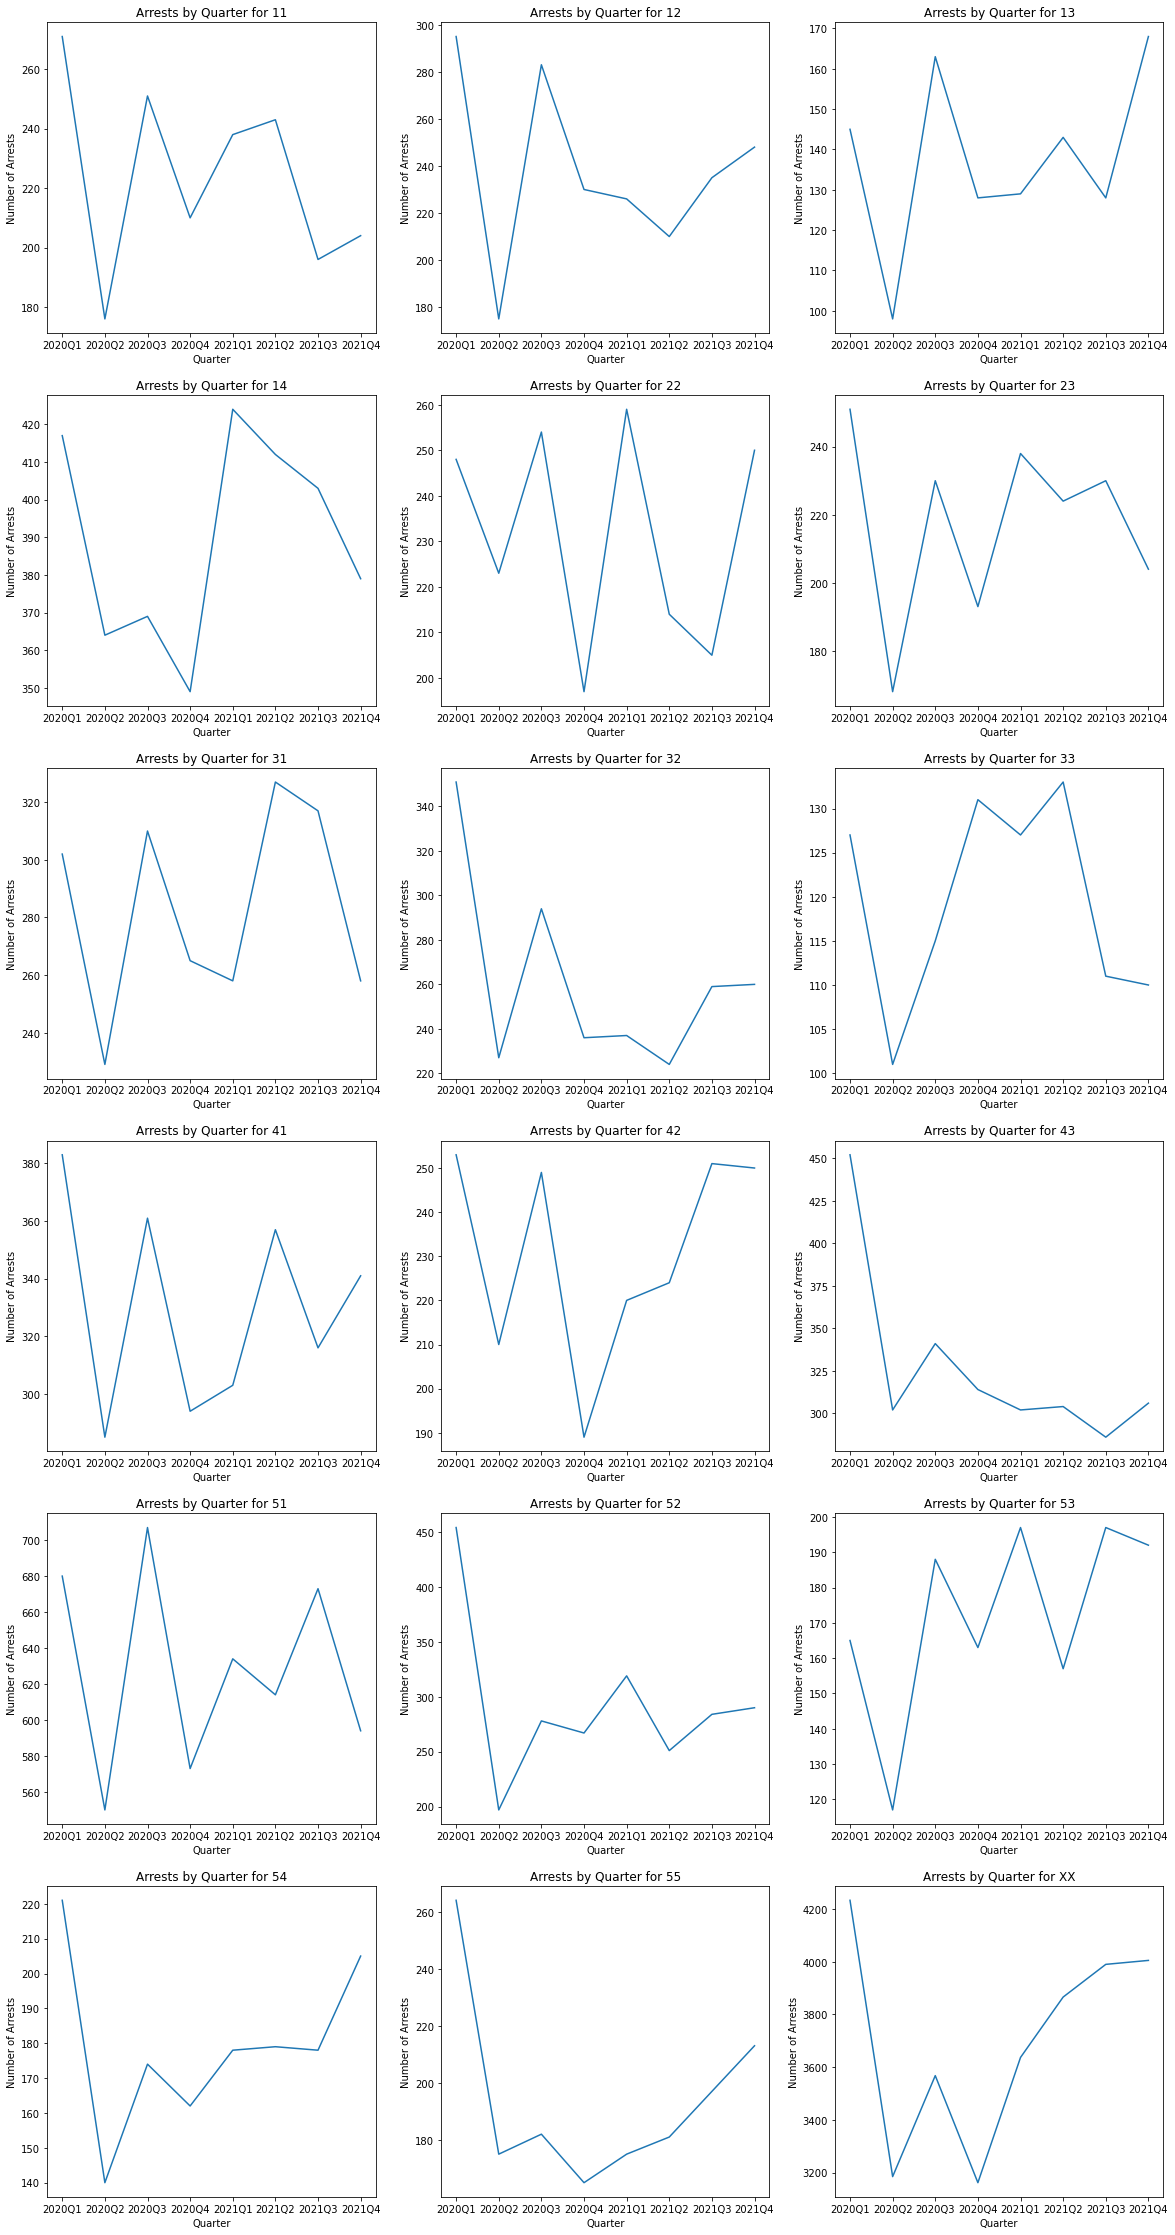

In [15]:
# Define a list of all locations
locations = arrest_counts['ArrestLocDiv'].unique()

# Define the order of quarters for plotting
quarters = ['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4']

# Set the number of rows and columns for the plot
num_rows = 6
num_cols = 3

# Create a new figure with a 3x6 subplot layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Create a line chart for each location
for i, location in enumerate(locations):
    # Calculate the row and column index for the current plot
    row = i // num_cols
    col = i % num_cols
    
    # Select the current subplot to plot on
    ax = axs[row][col]
    
    # Filter the data for the current location
    location_data = arrest_counts[arrest_counts['ArrestLocDiv'] == location]
    
    # Plot the data for the current location on the current subplot
    ax.plot(location_data['Quarter'], location_data['the number of arrest'])
    
    # Set the x-axis label, y-axis label, and title for the current plot
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Number of Arrests')
    ax.set_title('Arrests by Quarter for ' + location)
    
    # Set the x-tick labels to the desired order of quarters
    ax.set_xticklabels(quarters)
    
# Show the plot
plt.show()

In [18]:
# Convert Arrest_Month to quarters
data['Quarter'] = data['Arrest_Year'].astype(str) + data['Arrest_Month'].map(quarter_dict)

gta_values = ['11', '12', '13', '14', '22', '23', '31', '32', '33', '41', '42', '43', '51', '52', '53', '54', '55']
data['ArrestLocDiv'] = data['ArrestLocDiv'].apply(lambda x: 'GTA' if x in gta_values else 'Non-GTA')

# Group by Quarter and ArrestLocDiv, and count the number of rows
arrest_counts = data.groupby(['Quarter', 'ArrestLocDiv']).size().reset_index(name='the number of arrest')

# Print the first few rows of the resulting DataFrame
arrest_counts.head

<bound method NDFrame.head of    Quarter ArrestLocDiv  the number of arrest
0   2020Q1          GTA                  5279
1   2020Q1      Non-GTA                  4233
2   2020Q2          GTA                  3737
3   2020Q2      Non-GTA                  3185
4   2020Q3          GTA                  4749
5   2020Q3      Non-GTA                  3568
6   2020Q4          GTA                  4066
7   2020Q4      Non-GTA                  3162
8   2021Q1          GTA                  4464
9   2021Q1      Non-GTA                  3637
10  2021Q2          GTA                  4397
11  2021Q2      Non-GTA                  3866
12  2021Q3          GTA                  4466
13  2021Q3      Non-GTA                  3990
14  2021Q4          GTA                  4472
15  2021Q4      Non-GTA                  4005>

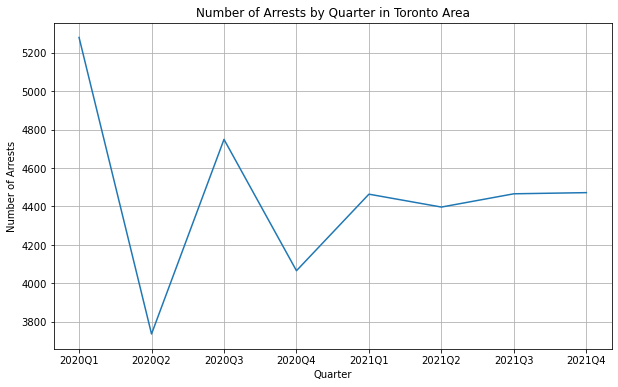

In [19]:
# Filter data by GTA locations
df_gta = data[data['ArrestLocDiv'] == 'GTA']

# Group by Quarter and count the number of rows
arrest_counts = df_gta.groupby(['Quarter']).size().reset_index(name='the number of arrest')

# Generate a line chart of the number of arrests by quarter for GTA locations
ax = arrest_counts.plot(kind='line', x='Quarter', y='the number of arrest', figsize=(10, 6), legend=False, grid=True, title='Number of Arrests by Quarter in Toronto Area')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Arrests')
plt.show()

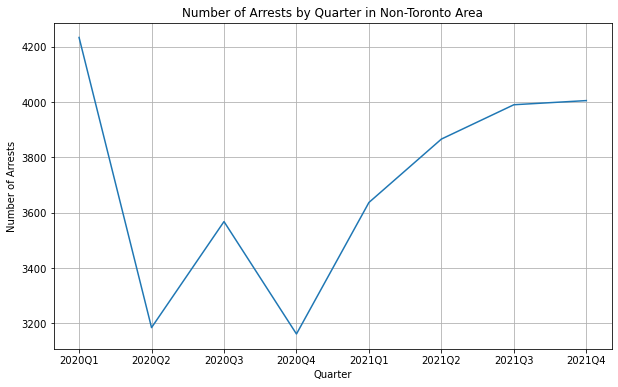

In [20]:
# Filter data by GTA locations
df_gta = data[data['ArrestLocDiv'] == 'Non-GTA']

# Group by Quarter and count the number of rows
arrest_counts = df_gta.groupby(['Quarter']).size().reset_index(name='the number of arrest')

# Generate a line chart of the number of arrests by quarter for GTA locations
ax = arrest_counts.plot(kind='line', x='Quarter', y='the number of arrest', figsize=(10, 6), legend=False, grid=True, title='Number of Arrests by Quarter in Non-Toronto Area')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Arrests')
plt.show()

In [21]:
# AGE & SEX

In [22]:
# Rename 'Aged 17 years and under' to 'Aged 17 years and younger'
data['Age_group__at_arrest_'] = data['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger')
# Rename 'Aged 65 and older' to 'Aged 65 years and older'
data['Age_group__at_arrest_'] = data['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')
# Drop NaN
data = data.dropna(subset=['Age_group__at_arrest_'])
data['Age_group__at_arrest_'].unique()

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 years and older',
       'Aged 17 years and younger'], dtype=object)

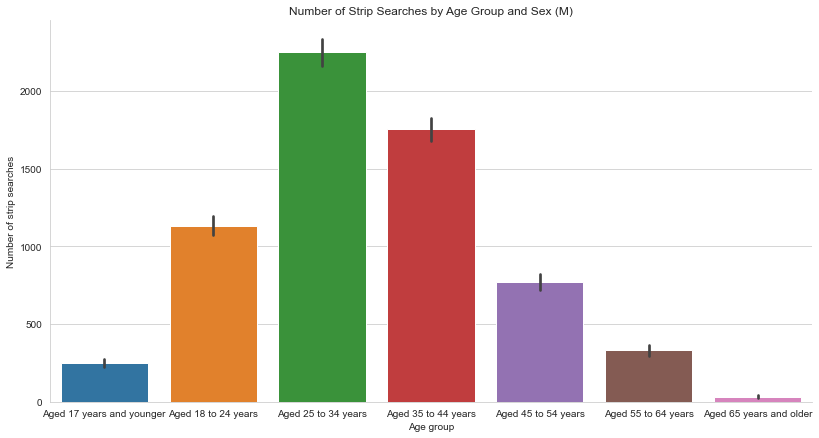

In [33]:
# Filter the DataFrame to include only rows where Sex is M
data_age_M = data[data['Sex'] == 'M']

# Define the order of the age groups for the x-axis
age_order = ['Aged 17 years and younger', 'Aged 18 to 24 years', 'Aged 25 to 34 years',
             'Aged 35 to 44 years', 'Aged 45 to 54 years', 'Aged 55 to 64 years', 'Aged 65 years and older']

# Create a line plot with bars using Seaborn
sns.set_style('whitegrid')
g_1 = sns.catplot(x='Age_group__at_arrest_', y='StripSearch', kind='bar', estimator=sum, order=age_order, data=data_age_M, height=6, aspect=1.5)

# Set the axis labels and plot title
plt.xlabel('Age group')
plt.ylabel('Number of strip searches')
plt.title('Number of Strip Searches by Age Group and Sex (M)')
# Set the size of the plot
g_1.fig.set_size_inches(12, 6)
# Show the plot
plt.show()

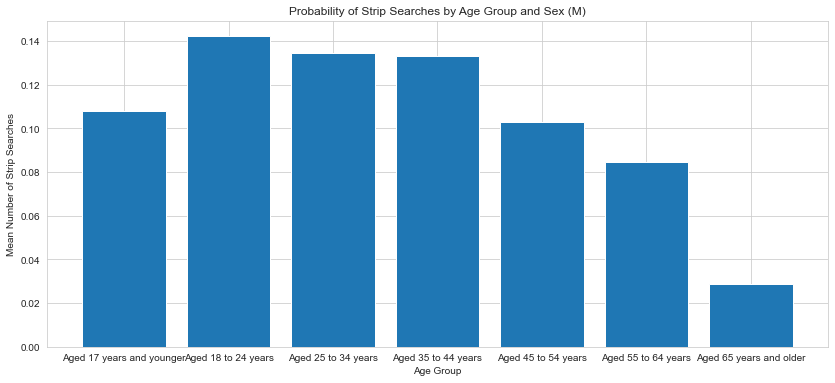

In [34]:
# compute the mean number of strip searches for each location
M_strip_searches = data_age_M.groupby('Age_group__at_arrest_')['StripSearch'].mean()

# create a bar chart of the data
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(M_strip_searches.index, M_strip_searches.values)
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Number of Strip Searches')
ax.set_title('Probability of Strip Searches by Age Group and Sex (M)')
plt.show()

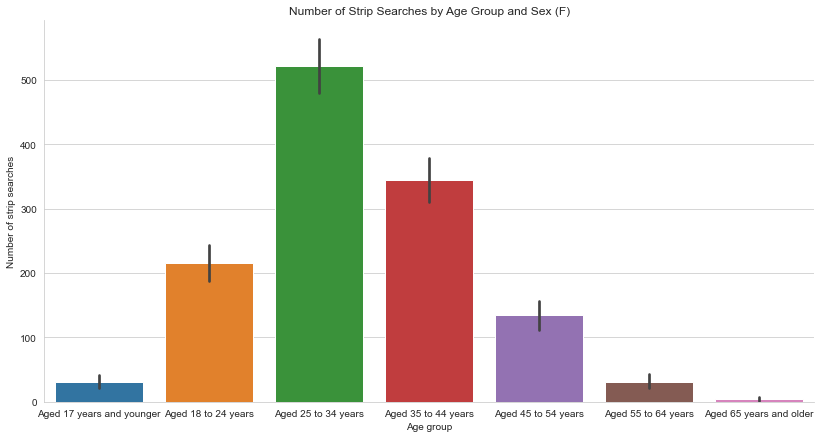

In [35]:
# Filter the DataFrame to include only rows where Sex is F
data_age_F = data[data['Sex'] == 'F']

# Create a line plot with bars using Seaborn
sns.set_style('whitegrid')
g_2 = sns.catplot(x='Age_group__at_arrest_', y='StripSearch', kind='bar', estimator=sum, order=age_order, data=data_age_F, height=6, aspect=1.5)

# Set the axis labels and plot title
plt.xlabel('Age group')
plt.ylabel('Number of strip searches')
plt.title('Number of Strip Searches by Age Group and Sex (F)')
# Set the size of the plot
g_2.fig.set_size_inches(12, 6)
# Show the plot
plt.show()

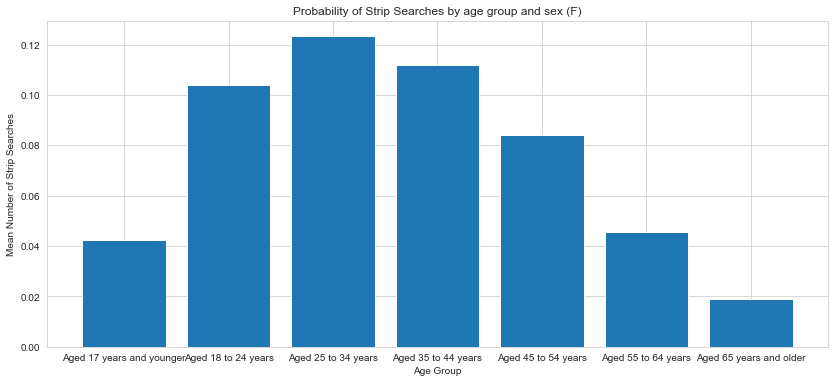

In [36]:
# compute the mean number of strip searches for each location
F_strip_searches = data_age_F.groupby('Age_group__at_arrest_')['StripSearch'].mean()

# create a bar chart of the data
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(F_strip_searches.index, F_strip_searches.values)
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Number of Strip Searches')
ax.set_title('Probability of Strip Searches by age group and sex (F)')
plt.show()

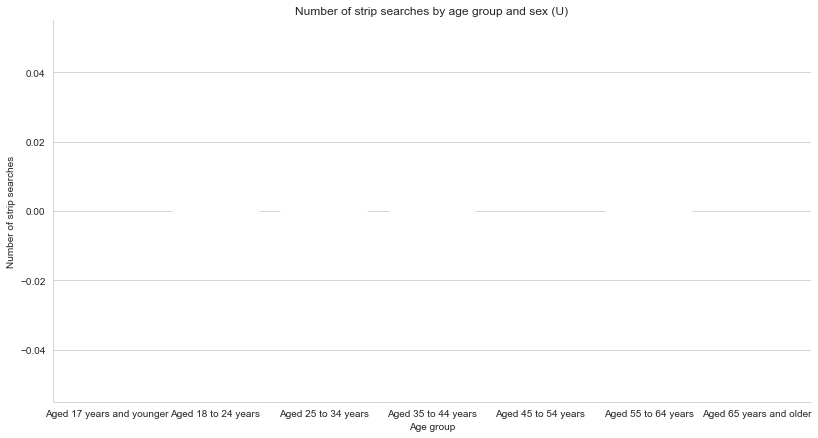

In [25]:
# Filter the DataFrame to include only rows where Sex is U
data_age_U = data[data['Sex'] == 'U']

# Create a line plot with bars using Seaborn
sns.set_style('whitegrid')
g_3 = sns.catplot(x='Age_group__at_arrest_', y='StripSearch', kind='bar', estimator=sum, order=age_order, data=data_age_U, height=6, aspect=1.5)

# Set the axis labels and plot title
plt.xlabel('Age group')
plt.ylabel('Number of strip searches')
plt.title('Number of strip searches by age group and sex (U)')
# Set the size of the plot
g_3.fig.set_size_inches(12, 6)
# Show the plot
plt.show()